# Import packages to work with & visualize data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Load data sets

In [2]:
movies = pd.read_csv('ml-latest-small/movies.csv')
ratings = pd.read_csv('ml-latest-small/ratings.csv')
tags = pd.read_csv('ml-latest-small/tags.csv')

# Look at the loaded data sets

In [3]:
display(movies)

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9737,193581,Black Butler: Book of the Atlantic (2017),Action|Animation|Comedy|Fantasy
9738,193583,No Game No Life: Zero (2017),Animation|Comedy|Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action|Animation


In [4]:
display(ratings)

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
...,...,...,...,...
100831,610,166534,4.0,1493848402
100832,610,168248,5.0,1493850091
100833,610,168250,5.0,1494273047
100834,610,168252,5.0,1493846352


In [5]:
display(tags)

,userId,movieId,tag,timestamp
0,2,60756,funny,1445714994
1,2,60756,Highly quotable,1445714996
2,2,60756,will ferrell,1445714992
3,2,89774,Boxing story,1445715207
4,2,89774,MMA,1445715200
...,...,...,...,...
3678,606,7382,for katie,1171234019
3679,606,7936,austere,1173392334
3680,610,3265,gun fu,1493843984
3681,610,3265,heroic bloodshed,1493843978


# 3 dataframes -> 1 cumulative dataframe 

In [6]:
merged_data = pd.merge(ratings, tags, how = 'left', left_on = ['userId','movieId'], right_on = ['userId','movieId'])
merged_data = pd.merge(merged_data, movies, how = 'left', on = 'movieId')

# Number of non-missing values in each column, Column data types

In [7]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102677 entries, 0 to 102676
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   userId       102677 non-null  int64  
 1   movieId      102677 non-null  int64  
 2   rating       102677 non-null  float64
 3   timestamp_x  102677 non-null  int64  
 4   tag          3476 non-null    object 
 5   timestamp_y  3476 non-null    float64
 6   title        102677 non-null  object 
 7   genres       102677 non-null  object 
dtypes: float64(2), int64(3), object(3)
memory usage: 7.1+ MB


# Number of missing data values from 2 columns

In [8]:
merged_data[pd.isna(merged_data['tag']) == True].count()

userId         99201
movieId        99201
rating         99201
timestamp_x    99201
tag                0
timestamp_y        0
title          99201
genres         99201
dtype: int64

# Number of data values all columns have

In [9]:
merged_data[pd.isna(merged_data['tag']) == False].count()

userId         3476
movieId        3476
rating         3476
timestamp_x    3476
tag            3476
timestamp_y    3476
title          3476
genres         3476
dtype: int64

# Percent of missing data

In [10]:
percent_missing = merged_data.isnull().sum() / merged_data.shape[0] * 100
percent_missing

userId          0.000000
movieId         0.000000
rating          0.000000
timestamp_x     0.000000
tag            96.614626
timestamp_y    96.614626
title           0.000000
genres          0.000000
dtype: float64

# Basic statistics for columns with numerical data

In [11]:
# Mostly only really applicable to the 'rating' column
merged_data.describe()

,userId,movieId,rating,timestamp_x,timestamp_y
count,102677.000000,102677.000000,102677.000000,1.026770e+05,3.476000e+03
mean,327.761933,19742.712623,3.514813,1.209495e+09,1.323525e+09
std,183.211289,35884.400990,1.043133,2.170117e+08,1.731554e+08
min,1.000000,1.000000,0.500000,8.281246e+08,1.137179e+09
25%,177.000000,1199.000000,3.000000,1.019138e+09,1.138032e+09
50%,328.000000,3005.000000,3.500000,1.186590e+09,1.279956e+09
75%,477.000000,8366.000000,4.000000,1.439916e+09,1.498457e+09
max,610.000000,193609.000000,5.000000,1.537799e+09,1.537099e+09


# Dropping the 2 'timestamp' columns

In [12]:
merged_data.drop(['timestamp_x', 'timestamp_y'], axis = 1, inplace=True)

# Current state of the data

In [13]:
display(merged_data)

,userId,movieId,rating,tag,title,genres
0,1,1,4.0,NaN,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,1,3,4.0,NaN,Grumpier Old Men (1995),Comedy|Romance
2,1,6,4.0,NaN,Heat (1995),Action|Crime|Thriller
3,1,47,5.0,NaN,Seven (a.k.a. Se7en) (1995),Mystery|Thriller
4,1,50,5.0,NaN,"Usual Suspects, The (1995)",Crime|Mystery|Thriller
...,...,...,...,...,...,...
102672,610,166534,4.0,NaN,Split (2017),Drama|Horror|Thriller
102673,610,168248,5.0,Heroic Bloodshed,John Wick: Chapter Two (2017),Action|Crime|Thriller
102674,610,168250,5.0,NaN,Get Out (2017),Horror
102675,610,168252,5.0,NaN,Logan (2017),Action|Sci-Fi


# Dataframe column names

In [14]:
merged_data.columns

Index(['userId', 'movieId', 'rating', 'tag', 'title', 'genres'], dtype='object')

# Top 10 Counts of columns: 'tag', 'userId', 'title' & 'rating'

In [15]:
merged_data['tag'].value_counts().head(10)

In Netflix queue     55
atmospheric          36
Disney               23
funny                23
surreal              23
superhero            23
thought-provoking    22
religion             22
quirky               21
psychology           20
Name: tag, dtype: int64

In [16]:
merged_data['userId'].value_counts().head(10)

599    2796
414    2698
474    2373
448    1864
274    1346
610    1303
68     1260
380    1218
606    1115
288    1055
Name: userId, dtype: int64

In [17]:
merged_data['title'].value_counts().head(10)

Pulp Fiction (1994)                          484
Forrest Gump (1994)                          335
Shawshank Redemption, The (1994)             319
Silence of the Lambs, The (1991)             283
Matrix, The (1999)                           280
Fight Club (1999)                            268
Star Wars: Episode IV - A New Hope (1977)    262
Braveheart (1995)                            245
Jurassic Park (1993)                         238
Terminator 2: Judgment Day (1991)            229
Name: title, dtype: int64

In [18]:
merged_data['rating'].value_counts().head(10)

4.0    27208
3.0    20189
5.0    13921
3.5    13424
4.5     8811
2.0     7563
2.5     5568
1.0     2819
1.5     1801
0.5     1373
Name: rating, dtype: int64

# Visuals showing the distribution of ratings on the whole data set

<AxesSubplot:xlabel='rating'>

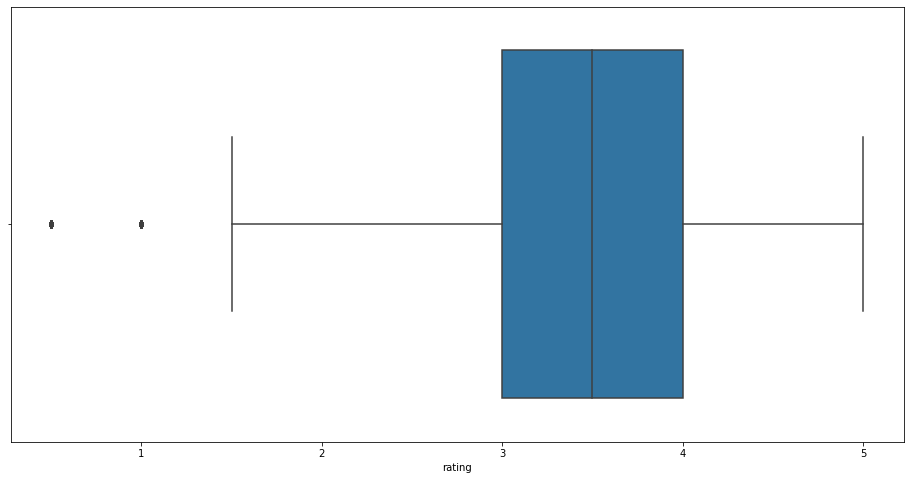

In [74]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=merged_data, x='rating',)

<AxesSubplot:xlabel='rating', ylabel='count'>

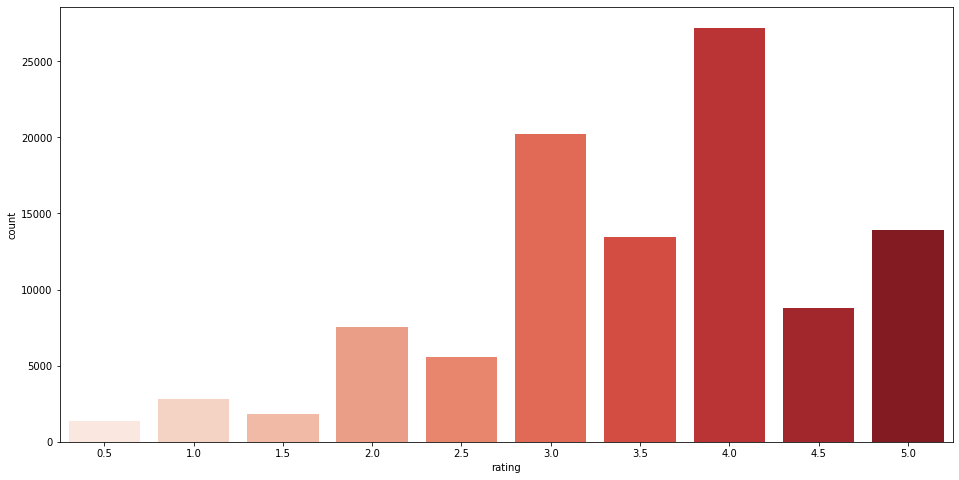

In [73]:
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x="rating", data=merged_data, palette="Reds")

# Number of unique values of columns: 'userId', 'movieId', 'tag', 'genres'

In [19]:
merged_data['userId'].nunique()

610

In [20]:
merged_data['movieId'].nunique()

9724

In [21]:
merged_data['tag'].nunique()

1543

In [22]:
merged_data['genres'].nunique()

951

# Number of movies/shows watched per user

In [38]:
user_movie_grouped = merged_data.groupby('userId',as_index = False)['movieId'].count().sort_values('movieId', ascending=False)
user_movie_grouped.columns = ['userId','movieCount']

In [39]:
# showing users with 100 or more shows/movies watched
user_movie_grouped[user_movie_grouped['movieCount'] > 100]

,userId,movieCount
598,599,2796
413,414,2698
473,474,2373
447,448,1864
273,274,1346
...,...,...
592,593,103
308,309,103
31,32,102
411,412,102


# Movies/shows with at least 1 tag

In [25]:
title_tag_grouped = merged_data.groupby('title',as_index = False)['tag'].count().sort_values('tag', ascending=False)
title_tag_grouped.columns = ['title','tag']

In [26]:
title_tag_grouped[title_tag_grouped['tag'] > 0]

,title,tag
6865,Pulp Fiction (1994),181
3011,Fight Club (1999),54
74,2001: A Space Odyssey (1968),41
5304,Léon: The Professional (a.k.a. The Professiona...,35
1048,"Big Lebowski, The (1998)",32
...,...,...
6402,"Outsiders, The (1983)",1
261,"African Queen, The (1951)",1
892,Beat the Devil (1953),1
4901,Laputa: Castle in the Sky (Tenkû no shiro Rapy...,1


# Movies/shows with 4 or higher rating

In [33]:
title_rating_grouped = merged_data.groupby('title',as_index = False)['rating'].mean().sort_values('rating', ascending=False)
title_rating_grouped.columns = ['title','rating']

In [34]:
title_rating_grouped[title_rating_grouped['rating'] > 4.0]

,title,rating
1952,Continental Divide (1981),5.000000
2289,Deathgasm (2015),5.000000
5953,My Left Eye Sees Ghosts (Ngo joh aan gin diy g...,5.000000
5957,My Life as McDull (Mak dau goo si) (2001),5.000000
5131,Little Murders (1971),5.000000
...,...,...
7828,Some Like It Hot (1959),4.010000
7591,Shaun of the Dead (2004),4.006494
4531,Jaws (1975),4.005495
7975,Stand by Me (1986),4.005495


# Let's look into the 2nd most viewed movie: 'Forrest Gump (1994)'

In [43]:
forrest_gump_data = merged_data[merged_data['title'] == 'Forrest Gump (1994)']
forrest_gump_data

,userId,movieId,rating,tag,title,genres
20,1,356,4.0,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War
731,6,356,5.0,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War
886,7,356,5.0,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War
1059,8,356,3.0,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War
1126,10,356,3.5,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War
...,...,...,...,...,...,...
98994,605,356,3.0,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War
99268,606,356,4.0,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War
100575,608,356,3.0,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War
101354,609,356,4.0,NaN,Forrest Gump (1994),Comedy|Drama|Romance|War


In [44]:
# Average rating over 4 with 335 unique views is quite good
forrest_gump_data['rating'].mean()

4.155223880597015

<AxesSubplot:xlabel='rating'>

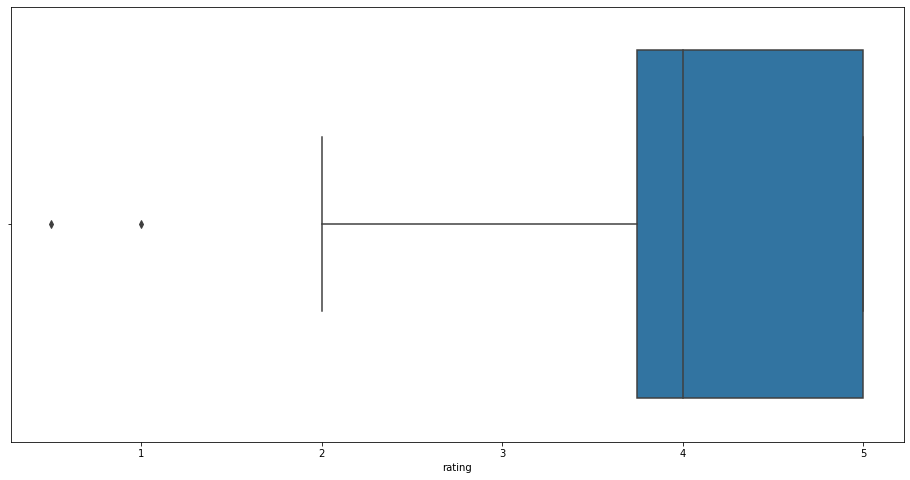

In [49]:
f, ax = plt.subplots(figsize=(16, 8))
sns.boxplot(data=forrest_gump_data, x='rating')

<AxesSubplot:xlabel='rating', ylabel='count'>

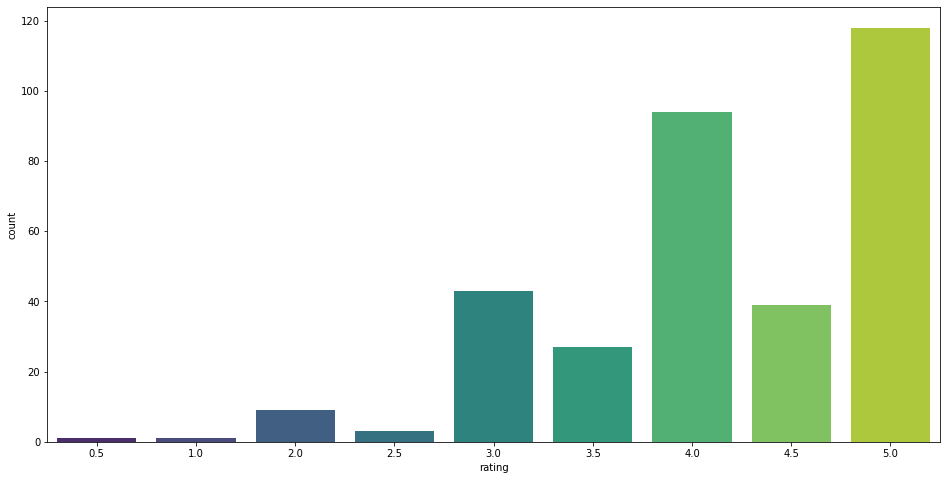

In [60]:
f, ax = plt.subplots(figsize=(16, 8))
sns.countplot(x="rating", data=forrest_gump_data, palette="viridis")

AxesSubplot(0.125,0.125;0.62x0.755)


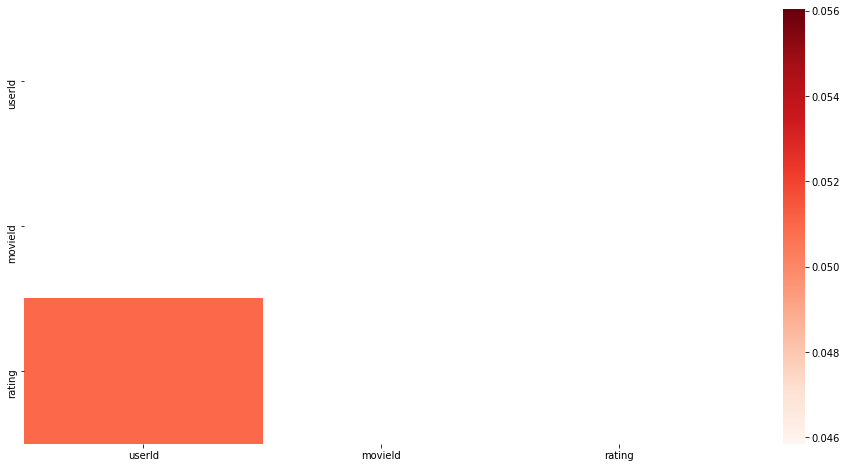

In [64]:
correlations = forrest_gump_data.corr()
f, ax = plt.subplots(figsize=(16, 8))
mask = np.zeros_like(correlations, dtype=np.bool)
mask[np.triu_indices_from(mask)]=True

heatmap_one = sns.heatmap(correlations, cmap='Reds', mask=mask)
print(heatmap_one)